# Lista de Exercícios 3: Transformada Z 

> Felipe Andrade Garcia Tommaselli- 11800910

- Slide Aula 3: https://marofe.github.io/controle-digital/2024/aula3.html



In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import pprint, simplify
import lcapy as lc 
from lcapy.discretetime import n, z
from lcapy import UnitImpulse, UnitStep

In [17]:
import sys
import os
# Adiciona o diretório pai ao caminho
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('utils.py'), '..')))

from Class3.utils import *


## Atividade 1: Cálculo Simbólico e Transformada Z no MATLAB

Nesta atividade, o objetivo é utilizar o recurso de cálculo simbólico do MATLAB para obter a transformada Z de um sinal.

### Exemplo:

Considere o seguinte exemplo:

$$ f[n] = 10 - e^{-5nT} $$

A transformada Z de $$ f[n] $$ pode ser obtida usando o MATLAB da seguinte forma: primeiramente, defina a equação literal no MATLAB. Para definir a variável $$ n $$ e outras variáveis que existirem na equação, como $$ T $$, utilize o comando `syms`. Em seguida, utilize o comando `ztrans`. 

O script a seguir demonstra o processo:

```matlab
close all % Fecha todas as janelas
clear all % Limpa a memória
clc % Limpa a command window
%%
syms T n % Define variáveis simbólicas
f = 10 - exp(-5 * n * T); % Define o sinal
F = ztrans(f); % Obtém a transformada Z
pretty(F) % Exibe a equação da transformada Z numa forma "bonita"
```

### Tarefa:

Seguindo a mesma lógica, encontre a transformada Z para os seguintes sinais:

1. $ f_a[n] = 1 + n \left(\frac{1}{3}\right)^n $
2. $ f_b[n] = \left(\frac{1}{2}\right)^n + n \left(\frac{1}{5}\right)^n $
3. $ f_c[n] = e^{anT} $
4. $ f_d[n] = nT $


In [18]:
# Definir simbolos
T = lc.symbols('T')
a = lc.symbols('a', real=True, positive=True)

# Definindo os sinais
f_exemplo = 10 - lc.exp(-5 * n * T)
f_a = 1 + n * (1/3)**n
f_b = (1/2)**n + n * (1/5)**n
f_c = lc.exp(a * n * T)
f_d = n * T


# Calculando a transformada Z para cada sinal
F_exemplo = f_exemplo.ZT()
F_a = f_a.ZT()
F_b = f_b.ZT()
F_c = f_c.ZT()
F_d = f_d.ZT()

F_exemplo = simplify(F_exemplo).evalf(1)
F_a = simplify(F_a).evalf(1)
F_b = simplify(F_b).evalf(1)
F_c = simplify(F_c).evalf(1)
F_d = simplify(F_d).evalf(1)


In [19]:
# Exibindo as transformadas Z de forma "bonita"
print("Transformada Z de f_exemplo[n]:\n")
pprint(F_exemplo)

Transformada Z de f_exemplo[n]:

        5⋅T             
     z⋅ℯ          1.0e+1
- ──────────── + ───────
     5⋅T               1
  z⋅ℯ    - 1.0   1.0 - ─
                       z


In [20]:
print('_.'*50)
print("Transformada Z de f_a[n]:\n")
pprint(F_a)

print('_.'*50)
print("\nTransformada Z de f_b[n]:\n")
pprint(F_b)

print('_.'*50)
print("\nTransformada Z de f_c[n]:\n")
pprint(F_c)

print('_.'*50)
print("\nTransformada Z de f_d[n]:\n")
pprint(F_d)
print('_.'*50)


_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.
Transformada Z de f_a[n]:

           3.0e+31⋅z                  1   
──────────────────────────────── + ───────
         2                               1
1.0e+32⋅z  - 7.0e+31⋅z + 1.0e+31   1.0 - ─
                                         z
_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.

Transformada Z de f_b[n]:

   2.0⋅z        0.2⋅z   
─────────── + ──────────
2.0⋅z - 1.0            2
              (z - 0.2) 
_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.

Transformada Z de f_c[n]:

   z    
────────
     T⋅a
z - ℯ   
_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.

Transformada Z de f_d[n]:

   T⋅z    
──────────
         2
(z - 1.0) 
_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.

## Atividade 2

Nessa atividade, o objetivo é usar o recurso de cálculo simbólico do MATLAB para obter a transformada Z Inversa. Para isso, considere o seguinte exemplo:

$$ F(z) = \frac{z}{z - \frac{1}{3}} $$

A transformada Z inversa de $$ F(z) $$ pode ser obtida usando o MATLAB da seguinte forma: primeiramente defina a equação literal no MATLAB, para definir a variável $$ z $$, e outras variáveis que existirem na equação, utilize o comando `syms`. Em seguida, utilize o comando `iztrans`. Após encontrar a transformada Z inversa, pode-se visualizar o sinal no tempo discreto usando o comando `subs`.

```matlab
close all % Fecha todas as janelas
clear all % Limpa a memória
clc % Limpa a command window
%%
syms z % Define variáveis simbólicas
F = z/(z - 1/3); % Define eq da transf. Z
f = iztrans(F); % Obtém transf. Z inversa
pretty(f) % Exibe na tela de forma "bonita"
td = 1:10; % Cria vetor de tempo discreto
figure
stem(td, subs(f, 'n', td)) % Exibe sinal em tempo discreto
```

Seguindo a mesma lógica, encontre a transformada Z inversa dos seguintes sinais e mostre ao menos as 10 primeiras amostras usando `stem`.

1. $ F_a(z) = \frac{1}{z} $

2. $ F_b(z) = \frac{z + 2}{(z - \frac{1}{3})(z - \frac{1}{4})} $

3. $ F_c(z) = \frac{5z}{z - \frac{1}{2}} + \frac{2z}{(z - \frac{1}{9})^2} $

4. $ F_d(z) = \frac{5z(z - \cos(5))}{z^2 - 2 \cos(5)z + 1} $

5. $ F_e(z) = \frac{3z}{3z - 2} $


In [21]:
# Definindo os sinais
F_a = 1 / z
F_b = (z + 2) / ((z - 1/3) * (z - 1/4))
F_c = (5 * z) / (z - 1/2) + (2 * z) / (z - 1/9)**2
F_d = (5 * z * (z - lc.cos(5))) / (z**2 - 2 * lc.cos(5) * z + 1)
F_e = (3 * z) / (3 * z - 2)

# Calculando a transformada Z inversa para cada sinal
F_a = F_a(n, causal=True)
F_b = F_b(n, causal=True)
F_c = F_c(n, causal=True)
F_d = F_d(n, causal=True)
F_e = F_e(n, causal=True)

# Exibindo as transformadas Z inversas de forma "bonita"
F_a = simplify(F_a).evalf(1)
F_b = simplify(F_b).evalf(1)
F_c = simplify(F_c).evalf(1)
F_d = simplify(F_d).evalf(1)
F_e = simplify(F_e).evalf(1)


In [22]:
print('_.'*50)
print("Transformada Z de f_a[n]:\n")
pprint(F_a)

print('_.'*50)
print("\nTransformada Z de f_b[n]:\n")
#pprint(F_b)
print(F_b)

print('_.'*50)
print("\nTransformada Z de f_c[n]:\n")
#pprint(F_c)
print(F_c)

print('_.'*50)
print("\nTransformada Z de f_d[n]:\n")
pprint(F_d)
print('_.'*50)

print("\nTransformada Z de f_e[n]:\n")
pprint(F_e)
print('_.'*50)


_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.
Transformada Z de f_a[n]:

UnitImpulse(n - 1)
_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.

Transformada Z de f_b[n]:

(-1.0e+2/4.0**n + 8.0e+1/3.0**n)*UnitStep(n) + 2.0e+1*UnitImpulse(n)
_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.

Transformada Z de f_c[n]:

2.0*1.0e+1**(2.0e+1 - 2.0e+1*n)*1.0e+15**(n - 1.0)*n*UnitStep(n) + 5.0*UnitStep(n)/2.0**n
_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.

Transformada Z de f_d[n]:

5.0⋅cos(5⋅n)⋅UnitStep(n)
_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.

Transformada Z de f_e[n]:

   -n            
2.0  ⋅UnitStep(n)
_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.


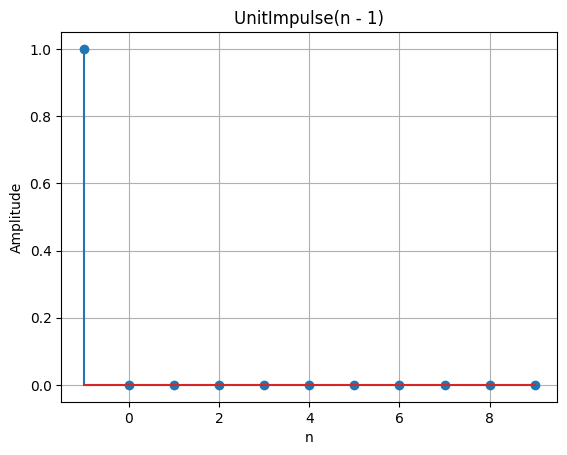

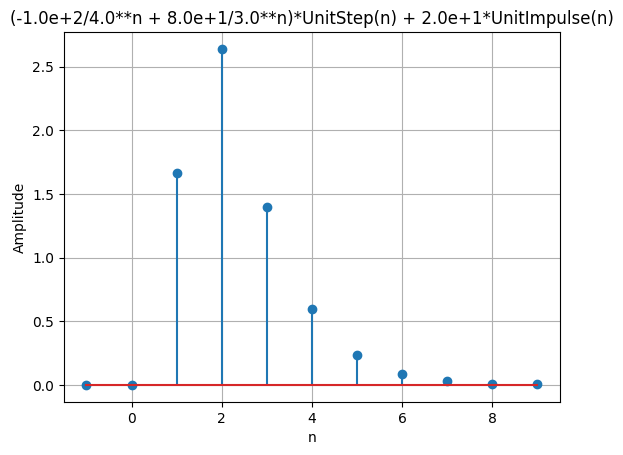

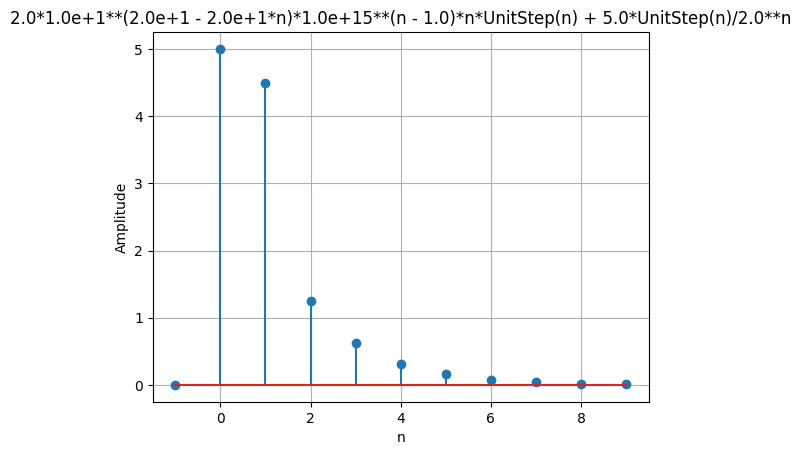

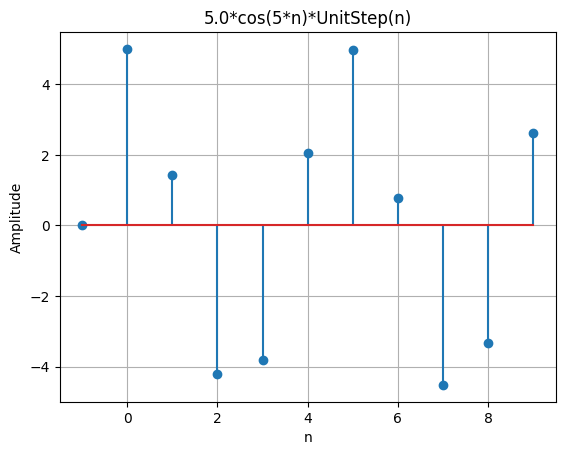

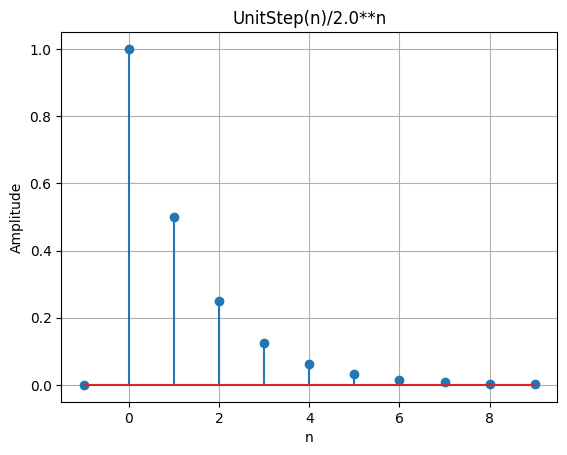

In [23]:
# Define o intervalo de n para visualização
LIM = 10
n_values = np.arange(-LIM, LIM) 


for signal in [F_a, F_b, F_c, F_d, F_e]:
    signal_in = signal
    signal = Convert(n_values, signal_in, LIM=LIM) 

    plt.stem(n_values[len(n_values)//2 - 1:], signal[len(signal)//2 - 1:])
    plt.title(f'{str(signal_in)}')
    plt.xlabel('n')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

### Atividade 3

Nessa atividade, o objetivo é usar o Matlab para obter as frações parciais de uma transformada Z na forma de função racional e em seguida obter a transformada Z inversa. Para isso, pode-se utilizar o comando `residuez` do Matlab conforme exemplo a seguir. Seja:

$$ X(z) = \frac{30(1 + 3z^{-1})}{30 - 16z^{-1} + 2z^{-2}} = \frac{A_1}{1 - p_1z^{-1}} + \frac{A_2}{1 - p_2z^{-1}} $$

Usando o seguinte código, obtém-se os coeficientes e polos da expansão em frações parciais de \(X(z)\):

```matlab
close all
clear all
clc
%%
format rational % configura exibição na forma de número racional
b = 30 * [1 3];
a = [30 -16 2];
[r, p] = residuez(b, a);
r % coeficientes
p % polos
```
Também pode-se obter a expansão em frações parciais usando o comando `residue`, porém, nesse caso, precisa considerar \(X(z)\) na forma:

$$
X(z) = \frac{30z(z + 3)}{30z^2 - 16z + 2}
$$

Portanto, primeiro deve-se considerar a expansão em frações parciais de \( \frac{X(z)}{z} \):

$$
\frac{X(z)}{z} = \frac{30(z + 3)}{30z^2 - 16z + 2} = \frac{A_1}{z - p_1} + \frac{A_2}{z - p_2}
$$

E após obter a expansão em frações parciais, basta multiplicar o resultado por \(z\) para obter o resultado para \(X(z)\):

$$
X(z) = \frac{A_1z}{z - p_1} + \frac{A_2z}{z - p_2}
$$

Além do mais, tomando a Transformada Z inversa, pode-se obter o sinal \(x[k]\) relacionado a \(X(z)\) da mesma forma que na Atividade 2.

```matlab
syms z % define variável simbólica
F = r(1) * z / (z - p(1)) + r(2) * z / (z - p(2)); % constrói transformada Z usando a expansão
f = iztrans(F); % calcula transformada Z inversa
t = 1:10; % define vetor de tempo discreto
fn = subs(f, 'n', t); % avalia f substituindo n por t
figure
stem(t, fn) % mostra resultado
```

**Atenção:** Caso tenha polos com multiplicidade, lembrar que precisa considerar a expansão na forma:

$$
\frac{1}{(z - p_j)^k} = \frac{A_{j1}}{(z - p_j)} + \frac{A_{j2}}{(z - p_j)^2} + \cdots + \frac{A_{jk}}{(z - p_j)^k}
$$

ou 

$$
\frac{1}{(1 - p_j z^{-1})^k} = \frac{A_{j1}}{(1 - p_j z^{-1})} + \frac{A_{j2}}{(1 - p_j z^{-1})^2} + \cdots + \frac{A_{jk}}{(1 - p_j z^{-1})^k}.
$$

Seguindo a mesma lógica, encontre o sinal das seguintes transformadas Z e mostre as primeiras 10 amostras do sinal usando o comando `stem`:

1. $ F_a(z) = \frac{1 + 2z^{-1}}{(1 - 3z^{-1})(1 - 4z^{-1})} $
   
2. $ F_b(z) = \frac{(z^2 + z + 5)z}{z^3 - \frac{31}{36}z^2 + \frac{5}{24}z - \frac{1}{72}} $

3. $ F_c(z) = 5 \frac{(1 - \frac{1}{3}z^{-1})(1 - \frac{1}{5}z^{-1})}{(1 - \frac{1}{2}z^{-1})^2(1 - \frac{1}{9}z^{-1})} $

4. $ F_d(z) = \frac{z(z - 7)}{z^3 - \frac{25}{12}z^2 + \frac{35}{24}z - \frac{5}{12}z + \frac{1}{24}} $

5. $ F_e(z) = \frac{3z^2 + 10}{(10z - 4)^3} $



## 4. Atividade 4

Usando a mesma lógica das atividades anteriores, encontre a resposta temporal do controle PID em tempo discreto a seguir.

Para essa atividade, considere a transformada Z de um controlador tipo PID na forma:

$$
C(z) = \frac{U(z)}{E(z)} = K_P + \frac{T}{2} \frac{z + 1}{z - 1} K_I + \frac{z - 1}{T z} K_D
$$

Considere também um erro em degrau ($E(z) = \frac{z}{z-1}$). Obtenha a transformada Z inversa de $U(z)$ usando o Matlab e mostre o resultado das primeiras 10 amostras do sinal de controle usando o comando `stem` para $T = 1$, e:

1. $K_P = 1, K_I = 0$ e $K_D = 0$;
2. $K_P = 10, K_I = 0$ e $K_D = 0$;
3. $K_P = 1, K_I = 1$ e $K_D = 0$;
4. $K_P = 1, K_I = 10$ e $K_D = 0$;
5. $K_P = 1, K_I = 0$ e $K_D = 1$.


## 5 Atividade 5

Considere um sistema de segunda ordem em tempo discreto dado por:

$$
G(z) = \frac{\omega_n^2 T^2 (z-1)^2}{4(z+1)^2 + T \omega_n \xi \frac{(z-1)}{(z+1)} + \omega_n^2}
$$

1. Obtenha a transformada Z do sistema em malha fechada para $T = 1$, $\omega_n = 1$ e $\xi = 0.5$ usando o recurso de cálculo simbólico do Matlab. Lembre que a função de transferência em malha fechada (realimentação unitária) é dada por:

   $$
   G_f(z) = \frac{Y(z)}{R(z)} = \frac{G(z)}{1 + G(z)}
   $$

2. Usando o Teorema do Valor Final, obtenha o valor de regime estacionário do sistema em malha fechada para uma referência em degrau deslocado em 1 amostra $\left(\hat{R}(z) = \frac{1}{z-1}\right)$ (dica: use o comando `subs` na transformada Z):

   $$
   \lim_{n \to \infty} y[n] = \lim_{z \to 1} (z - 1)Y(z)
   $$

3. Mostre as 50 primeiras amostras do sinal de saída do sistema em malha fechada do exercício anterior usando o comando `stem`. A saída em regime estacionário coincide com o valor calculado pelo teorema do valor final?
